In [ ]:
import pandas as pd


##Loading the datasets

In [ ]:
#The function when called should return the shape, information and the first 5 rows of our dataset.
def information(d):
  print(d.shape)
  print(d.info())
  

In [ ]:
# Loading sheet 4 on our excel_workbook.
bribes = pd.read_excel('/content/Book1.xlsx', sheet_name=4)
information(bribes)

(34, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_officer         34 non-null     object 
 1   Year                   34 non-null     int64  
 2   Average no. of bribes  33 non-null     float64
 3   Average bribe size     32 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB
None


In [ ]:
reason = pd.read_excel('Book1.xlsx', sheet_name=7)
reason.head()

,public_office,Year,Avoid cancelation of public utilities,Avoid fine,Don't Know,Make finalization of procedure possible,No specific purpose,Recieve information,Recieve preferential treatment,Sign of appreciation,Speed up procedure
0,Customs/Immigration officers,2019,NaN,0.219544,NaN,NaN,0.211897,NaN,NaN,NaN,0.240875
1,Public utilities officers,2019,0.386596,0.156100,NaN,NaN,NaN,NaN,NaN,NaN,0.309514
2,Federal Road Safety Corps,2019,NaN,0.344109,NaN,0.080949,NaN,NaN,NaN,NaN,0.333386
3,Tax/Revenue officers,2019,NaN,0.282612,NaN,0.081909,NaN,NaN,NaN,NaN,0.351141
4,Police officers,2019,NaN,0.294456,NaN,NaN,0.099797,NaN,NaN,NaN,0.364823


In [ ]:
corruption_stat =pd.read_excel('CorruptionStatistics_by_State_full.xlsx', sheet_name=0)
information(corruption_stat)

(37, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 33 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   STATE_ID                                                                  37 non-null     int64  
 1   STATE                                                                     37 non-null     object 
 2   Region                                                                    37 non-null     object 
 3   Sample size                                                               37 non-null     int64  
 4   Population                                                                37 non-null     int64  
 5   Rural population                                                          37 non-null     int64  
 6   Urban population                                           

In [ ]:
#loading the first sheet on our excel workbook Book 1
populas = pd.read_excel('Book1.xlsx', sheet_name= 0)

#loading the second sheet in our excel workbook Book 1
public_officials =pd.read_excel('Book1.xlsx', sheet_name=1)

In [ ]:
#The shape, information and first five rows of public offices dataset
information(public_officials)

(38, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Unnamed: 0                                                                            38 non-null     object 
 1   Police officers                                                                       38 non-null     float64
 2   Judges/Magistrates at the court                                                       38 non-null     float64
 3   Prosecutors                                                                           38 non-null     float64
 4   Judges/Magistrates at the court/Prosecutors                                           38 non-null     float64
 5   Tax/revenues officers                                                         

In [ ]:
#Information on pop dataset i.e. shape, info and first few rows.
information(populas)

(37, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STATE_ID     37 non-null     int64 
 1   STATE        37 non-null     object
 2   Region       37 non-null     object
 3   Sample size  37 non-null     int64 
 4   Population   37 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB
None


##Data cleaning


In [ ]:
#Replacing the column heading unnamed to state, it's in capital to match column heading state in public offices dataset
public_officials.columns =public_officials.columns.str.replace('Unnamed: 0', 'STATE')

In [ ]:
#Standardization. I need all column names to be written in lowercase.
def lower_case(x):
  x.columns = x.columns.str.lower().str.replace(' ','_')

lower_case(df)
lower_case(reason)
lower_case(corruption_stat) 
lower_case(bribes) 

In [ ]:
#Dropping unnecessary columns
corruption_stat =corruption_stat.drop(columns='state_id')

In [ ]:
#checking for null values per column
#create a function
def empty(data):
  print(data.isnull().any())
  print('\n')
  print(data.isnull().sum())
    

In [ ]:
empty(df)

state              False
population         False
prevalence_in_%    False
dtype: bool


state              0
population         0
prevalence_in_%    0
dtype: int64


In [ ]:
empty(reason)

public_office                              False
year                                       False
avoid_cancelation_of_public_utilities       True
avoid_fine                                  True
don't_know                                  True
make_finalization_of_procedure_possible     True
no_specific_purpose                         True
recieve_information                         True
recieve_preferential_treatment              True
sign_of_appreciation                        True
speed_up_procedure                         False
dtype: bool


public_office                               0
year                                        0
avoid_cancelation_of_public_utilities      13
avoid_fine                                  5
don't_know                                 14
make_finalization_of_procedure_possible     7
no_specific_purpose                        10
recieve_information                        14
recieve_preferential_treatment             11
sign_of_appreciation             

In [ ]:
#checking for duplicates
def dup(d):
  print(d.duplicated().any())

In [ ]:
dup(reason)
dup(df)
dup(bribes)
dup(corruption_stat)

False
False
False
False


##Data consolidation

In [ ]:
public_officials.head()

,STATE,Police officers,Judges/Magistrates at the court,Prosecutors,Judges/Magistrates at the court/Prosecutors,Tax/revenues officers,Customs officers,Public utilities officers,Doctors,Nurses,Doctors/Nurses,Teacher/Lecturers,Car registration/driving license agency officers,Officials from Traffic Management Authority,Members of the Armed forces,Land registry officers,Elected representatives from Local/State government,Members of Parliament/Legislature,Elected representatives from Local/State governmentMembers of Parliament/Legislature,Immigration Service officers,Embassy/consulate officers of foreign countries,Other public official/civil servant,Total public officials,Year
0,Abia,0.440299,0.166671,0.399980,0.217390,0.218748,0.833340,0.242105,0.113401,0.108695,0.140626,0.176991,0.249997,0.222224,0.666611,0.499969,0.142862,0.000000,0.136369,0.333306,0.19999,0.096778,0.358,2016
1,Adamawa,0.588889,0.749997,1.000000,0.799998,0.900004,0.600015,0.636365,0.151516,0.218751,0.210527,0.285716,0.000000,0.000000,0.666625,0.666625,0.285707,0.666625,0.375015,1.000000,0.00000,0.285707,0.453,2016
2,Akwa-ibom,0.253164,0.111115,0.166671,0.133338,0.073169,0.500000,0.157895,0.029850,0.026666,0.038217,0.052941,0.000000,0.166671,0.333352,0.500000,0.000000,0.500000,0.000000,0.500000,0.00000,0.021740,0.181,2016
3,Anambra,0.527273,0.111115,0.428568,0.200001,0.500000,0.400013,0.174359,0.100529,0.098446,0.109524,0.156118,0.142855,0.600003,0.333352,0.000000,0.125005,0.000000,0.090913,0.333352,0.00000,0.050002,0.270,2016
4,Bauchi,0.375000,0.333333,0.285720,0.324325,0.510637,0.200006,0.083333,0.008299,0.003584,0.009346,0.095239,0.285720,0.000000,0.181817,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200,2016


In [ ]:
#Lowering and replacing the space with underscore of the columns in the two datasets.
lower_case(populas)
lower_case(public_officials)

In [ ]:
#merging the two datasets on column state
public_officials = public_officials.merge( populas,how ="left",on ='state')
public_officials.head()

,state,police_officers,judges/magistrates_at_the_court,prosecutors,judges/magistrates_at_the_court/prosecutors,tax/revenues_officers,customs_officers,public_utilities_officers,doctors,nurses,doctors/nurses,teacher/lecturers,car_registration/driving_license_agency_officers,officials_from_traffic_management_authority,members_of_the_armed_forces,land_registry_officers,elected_representatives_from_local/state_government,members_of_parliament/legislature,elected_representatives_from_local/state_governmentmembers_of_parliament/legislature,immigration_service_officers,embassy/consulate_officers_of_foreign_countries,other_public_official/civil_servant,total_public_officials,year,state_id,region,sample_size,population
0,Abia,0.440299,0.166671,0.399980,0.217390,0.218748,0.833340,0.242105,0.113401,0.108695,0.140626,0.176991,0.249997,0.222224,0.666611,0.499969,0.142862,0.000000,0.136369,0.333306,0.19999,0.096778,0.358,2016,1.0,South-East,900.0,3616382.0
1,Adamawa,0.588889,0.749997,1.000000,0.799998,0.900004,0.600015,0.636365,0.151516,0.218751,0.210527,0.285716,0.000000,0.000000,0.666625,0.666625,0.285707,0.666625,0.375015,1.000000,0.00000,0.285707,0.453,2016,2.0,North-East,779.0,4111706.0
2,Akwa-ibom,0.253164,0.111115,0.166671,0.133338,0.073169,0.500000,0.157895,0.029850,0.026666,0.038217,0.052941,0.000000,0.166671,0.333352,0.500000,0.000000,0.500000,0.000000,0.500000,0.00000,0.021740,0.181,2016,3.0,South-South,900.0,5272029.0
3,Anambra,0.527273,0.111115,0.428568,0.200001,0.500000,0.400013,0.174359,0.100529,0.098446,0.109524,0.156118,0.142855,0.600003,0.333352,0.000000,0.125005,0.000000,0.090913,0.333352,0.00000,0.050002,0.270,2016,4.0,South-East,900.0,5356592.0
4,Bauchi,0.375000,0.333333,0.285720,0.324325,0.510637,0.200006,0.083333,0.008299,0.003584,0.009346,0.095239,0.285720,0.000000,0.181817,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200,2016,5.0,North-East,891.0,6286719.0


In [ ]:
#dropping the column state_id
pop = public_officials.drop('state_id', axis=1)

In [ ]:
#defining a function replace_percentage. The function takes the parameters dst- dataset and col- column. It multiplies the percentage values in the columns and multiplies
#with the population of that state, the replaces the percentage value with the value computated.This is because we want to obtained the population of people
#having stated to have come into contact with corrupt public officers.
def replace_percentage(dst,col):
  val = dst[col].values
  num = dst['population']
  dst[col] = dst[col].replace(to_replace= val, value= val*num)

In [ ]:
#In the next three cells, the function is called and the computation done to all columns with percentages 
replace_percentage(pop,'police_officers')

In [ ]:
replace_percentage(pop,'judges/magistrates_at_the_court')
replace_percentage(pop,'prosecutors')
replace_percentage(pop,'judges/magistrates_at_the_court/prosecutors')
replace_percentage(pop,'tax/revenues_officers')
replace_percentage(pop,'customs_officers')
replace_percentage(pop,'public_utilities_officers')
replace_percentage(pop,'doctors')
replace_percentage(pop,'nurses')
replace_percentage(pop,'doctors/nurses')
replace_percentage(pop,'teacher/lecturers')
replace_percentage(pop,'car_registration/driving_license_agency_officers')
replace_percentage(pop,'officials_from_traffic_management_authority')
replace_percentage(pop,'members_of_the_armed_forces')
replace_percentage(pop,'land_registry_officers')
replace_percentage(pop,'elected_representatives_from_local/state_government')
replace_percentage(pop,'members_of_parliament/legislature')
replace_percentage(pop,'elected_representatives_from_local/state_governmentmembers_of_parliament/legislature')
replace_percentage(pop,'immigration_service_officers')
replace_percentage(pop,'embassy/consulate_officers_of_foreign_countries')
replace_percentage(pop,'other_public_official/civil_servant')
replace_percentage(pop,'total_public_officials')

In [ ]:
#On viewing the dataset we notice that the float value is in standard form.
pop

,state,police_officers,judges/magistrates_at_the_court,prosecutors,judges/magistrates_at_the_court/prosecutors,tax/revenues_officers,customs_officers,public_utilities_officers,doctors,nurses,doctors/nurses,teacher/lecturers,car_registration/driving_license_agency_officers,officials_from_traffic_management_authority,members_of_the_armed_forces,land_registry_officers,elected_representatives_from_local/state_government,members_of_parliament/legislature,elected_representatives_from_local/state_governmentmembers_of_parliament/legislature,immigration_service_officers,embassy/consulate_officers_of_foreign_countries,other_public_official/civil_servant,total_public_officials,year,region,sample_size,population
0,Abia,1.592288e+06,6.027470e+05,1.446481e+06,7.861666e+05,7.910748e+05,3.013677e+06,8.755442e+05,410102.688280,393084.362004,5.085561e+05,6.400670e+05,9.040861e+05,8.036460e+05,2.410721e+06,1.808079e+06,5.166444e+05,0.000000e+00,4.931616e+05,1.205361e+06,7.232404e+05,3.499846e+05,1294664.756,2016,South-East,900.0,3616382.0
1,Adamawa,2.421338e+06,3.083767e+06,4.111706e+06,3.289357e+06,3.700551e+06,2.467086e+06,2.616544e+06,622987.903583,899440.251951,8.656240e+05,1.174781e+06,0.000000e+00,0.000000e+00,2.740964e+06,2.740964e+06,1.174741e+06,2.740964e+06,1.541951e+06,2.204648e+06,0.000000e+00,1.174741e+06,1862602.818,2016,North-East,779.0,4111706.0
2,Akwa-ibom,1.334689e+06,5.858032e+05,8.786965e+05,7.029612e+05,3.857491e+05,6.295936e+06,8.324259e+05,157372.295835,140585.920001,2.014797e+05,2.791058e+05,0.000000e+00,8.786965e+05,1.757443e+06,2.415576e+06,0.000000e+00,2.415576e+06,0.000000e+00,2.636014e+06,0.000000e+00,1.146132e+05,954237.249,2016,South-South,900.0,5272029.0
3,Anambra,2.824385e+06,5.951991e+05,2.295664e+06,1.071326e+06,2.678296e+06,2.142709e+06,9.339692e+05,538495.391283,527334.896615,5.866759e+05,8.362596e+05,7.652152e+05,3.213973e+06,1.785631e+06,0.000000e+00,6.696021e+05,0.000000e+00,4.869852e+05,1.785631e+06,0.000000e+00,2.678409e+05,1446279.840,2016,South-East,900.0,5356592.0
4,Bauchi,2.357521e+06,2.095573e+06,1.796242e+06,2.038942e+06,3.210232e+06,1.257379e+06,5.238912e+05,52173.414611,22533.672563,5.875327e+04,5.987385e+05,1.796242e+06,0.000000e+00,1.143032e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1257343.800,2016,North-East,891.0,6286719.0
5,Bayelsa,1.081126e+06,0.000000e+00,2.205008e+05,9.187440e+04,4.008302e+05,0.000000e+00,9.245307e+05,92632.078243,96694.879963,1.377874e+05,6.113732e+05,0.000000e+00,1.102549e+06,3.149558e+05,7.348327e+05,3.489099e+05,7.348327e+05,2.204648e+05,2.204648e+06,0.000000e+00,3.215162e+05,769422.152,2016,South-South,900.0,2204648.0
6,Benue,3.207625e+06,1.695849e+06,1.632370e+06,1.675488e+06,1.741188e+06,9.249813e+05,1.090186e+06,296701.011649,112122.111791,3.879975e+05,4.927602e+05,2.348103e+06,2.018192e+06,3.542492e+05,1.585752e+06,2.774951e+05,1.585752e+06,4.060891e+05,0.000000e+00,0.000000e+00,8.325078e+05,2042413.616,2016,North-Central,895.0,5550037.0
7,Borno,3.127725e+06,2.012722e+06,7.044711e+05,1.536993e+06,8.287689e+05,2.254194e+06,1.927949e+06,697731.570068,633205.259438,1.106984e+06,1.748946e+06,4.025379e+06,9.393073e+05,1.878504e+06,1.690654e+06,5.123445e+05,1.690654e+06,4.696474e+05,3.622854e+06,9.393073e+05,1.878465e+06,2953025.056,2016,North-East,900.0,5635544.0
8,C/river,2.461742e+06,1.403196e+06,0.000000e+00,1.122560e+06,2.221734e+06,9.354041e+05,9.594478e+05,438234.357925,496701.175659,6.189476e+05,9.354595e+05,1.727013e+06,1.559050e+06,1.870919e+06,9.354041e+05,3.980586e+05,9.354041e+05,4.677344e+05,1.496842e+06,0.000000e+00,3.118204e+05,2809576.800,2016,South-South,886.0,3741838.0
9,Delta,2.954551e+06,8.400478e+05,0.000000e+00,5.747696e+05,1.680093e+06,7.909368e+05,1.242833e+06,815906.994451,425980.713294,8.338392e+05,9.214256e+05,1.293232e+06,1.456083e+06,4.550259e+05,0.000000e+00,4.748097e+05,0.000000e+00,4.550259e+05,9.100518e+05,1.092062e+06,2.991944e+05,1829204.185,2016,South-South,900.0,5460311.0


In [ ]:
# rounding off the computed values to one decimal place.
pop.iloc[:, 1:23] = round(pop.iloc[:, 1:23])

In [ ]:
# Upon viewing the dataset, the values have been rounded off.
pop.head()

,state,police_officers,judges/magistrates_at_the_court,prosecutors,judges/magistrates_at_the_court/prosecutors,tax/revenues_officers,customs_officers,public_utilities_officers,doctors,nurses,doctors/nurses,teacher/lecturers,car_registration/driving_license_agency_officers,officials_from_traffic_management_authority,members_of_the_armed_forces,land_registry_officers,elected_representatives_from_local/state_government,members_of_parliament/legislature,elected_representatives_from_local/state_governmentmembers_of_parliament/legislature,immigration_service_officers,embassy/consulate_officers_of_foreign_countries,other_public_official/civil_servant,total_public_officials,year,region,sample_size,population
0,Abia,1592288.0,602747.0,1446481.0,786167.0,791075.0,3013677.0,875544.0,410103.0,393084.0,508556.0,640067.0,904086.0,803646.0,2410721.0,1808079.0,516644.0,0.0,493162.0,1205361.0,723240.0,349985.0,1294665.0,2016,South-East,900.0,3616382.0
1,Adamawa,2421338.0,3083767.0,4111706.0,3289357.0,3700551.0,2467086.0,2616544.0,622988.0,899440.0,865624.0,1174781.0,0.0,0.0,2740964.0,2740964.0,1174741.0,2740964.0,1541951.0,2204648.0,0.0,1174741.0,1862603.0,2016,North-East,779.0,4111706.0
2,Akwa-ibom,1334689.0,585803.0,878696.0,702961.0,385749.0,6295936.0,832426.0,157372.0,140586.0,201480.0,279106.0,0.0,878696.0,1757443.0,2415576.0,0.0,2415576.0,0.0,2636014.0,0.0,114613.0,954237.0,2016,South-South,900.0,5272029.0
3,Anambra,2824385.0,595199.0,2295664.0,1071326.0,2678296.0,2142709.0,933969.0,538495.0,527335.0,586676.0,836260.0,765215.0,3213973.0,1785631.0,0.0,669602.0,0.0,486985.0,1785631.0,0.0,267841.0,1446280.0,2016,South-East,900.0,5356592.0
4,Bauchi,2357521.0,2095573.0,1796242.0,2038942.0,3210232.0,1257379.0,523891.0,52173.0,22534.0,58753.0,598739.0,1796242.0,0.0,1143032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1257344.0,2016,North-East,891.0,6286719.0


In [ ]:
#Loading sheet 3 in the excel workbook
twenty_nineteen = pd.read_excel('/content/Book1.xlsx', sheet_name= 3)
twenty_nineteen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   state                                           37 non-null     object 
 1   population                                      37 non-null     int64  
 2   Doctors, Nurses, Midwives                       37 non-null     float64
 3   Police officers                                 37 non-null     float64
 4   Public utility officers                         37 non-null     float64
 5   Teachers/Lecturers                              37 non-null     float64
 6   Federal Road Safety Corps                       37 non-null     float64
 7   Vehicle inspection officers                     37 non-null     float64
 8   Elected local/state government representatives  37 non-null     float64
 9   Members of the Armed Forces                  

In [ ]:
#Lowering the case of the column names and replacing spaces with an underscore.
lower_case(twenty_nineteen)

In [ ]:
#In the next few cells, we compared the rows of the two datasets as we intend to concat. The columns that display information on similar public offices had to
# have the same name and hence we replaced the named of a lot of columns.
twenty_nineteen.columns


Index(['state', 'population', 'doctors,_nurses,_midwives', 'police_officers',
       'public_utility_officers', 'teachers/lecturers',
       'federal_road_safety_corps', 'vehicle_inspection_officers',
       'elected_local/state_government_representatives',
       'members_of_the_armed_forces', 'tax/revenue_officers',
       'customs/immigration_officers', 'members_of_parliament/legislature',
       'land_registry_officers', 'judges/magistrates', 'prosecutors',
       'embassy/consulate_officers', 'other_health_workers',
       'other_public_official', 'year'],
      dtype='object')

In [ ]:
pop.columns

Index(['state', 'police_officers', 'judges/magistrates_at_the_court',
       'prosecutors', 'judges/magistrates_at_the_court/prosecutors',
       'tax/revenues_officers', 'customs_officers',
       'public_utilities_officers', 'doctors', 'nurses', 'doctors/nurses',
       'teacher/lecturers', 'car_registration/driving_license_agency_officers',
       'officials_from_traffic_management_authority',
       'members_of_the_armed_forces', 'land_registry_officers',
       'elected_representatives_from_local/state_government',
       'members_of_parliament/legislature',
       'elected_representatives_from_local/state_governmentmembers_of_parliament/legislature',
       'immigration_service_officers',
       'embassy/consulate_officers_of_foreign_countries',
       'other_public_official/civil_servant', 'total_public_officials', 'year',
       'region', 'sample_size', 'population'],
      dtype='object')

In [ ]:
twenty_nineteen.columns = twenty_nineteen.columns.str.replace('elected_local/state_government_representatives','elected_representatives_from_local/state_government')

In [ ]:
#The function was created for replacing column names. It's parameters were a- dataset, b- old name, c-new name
def replace(a,b,c):
  a.columns = a.columns.str.replace(b,c)

In [ ]:
replace(twenty_nineteen,'judges/magistrates','judges/magistrates_at_the_court')
replace(twenty_nineteen,'embassy/consulate_officers','embassy/consulate_officers_of_foreign_countries')
replace(twenty_nineteen,'other_public_official','other_public_official/civil_servant')
replace(twenty_nineteen,'customs/immigration_officers','immigration_service_officers')
replace(twenty_nineteen,'teachers/lecturers','teacher/lecturers')
replace(twenty_nineteen,'public_utility_officers','public_utilities_officers')
replace(twenty_nineteen,'tax/revenue_officers','tax/revenues_officers')

In [ ]:
# On viewing the dataset, the names had been changed.
twenty_nineteen.tail()

,state,population,"doctors,_nurses,_midwives",police_officers,public_utilities_officers,teacher/lecturers,federal_road_safety_corps,vehicle_inspection_officers,elected_representatives_from_local/state_government,members_of_the_armed_forces,tax/revenues_officers,immigration_service_officers,members_of_parliament/legislature,land_registry_officers,judges/magistrates_at_the_court,prosecutors,embassy/consulate_officers_of_foreign_countries,other_health_workers,other_public_official/civil_servant,year
32,Rivers,2300736,0.061001,0.305008,0.213641,0.091001,0.196419,0.174028,0.070311,0.102767,0.225523,0.147229,0.080709,0.233268,0.168805,0.187424,0.049868,0.045517,0.090833,2019
33,Sokoto,2173501,0.061001,0.136709,0.213641,0.091001,0.196419,0.174028,0.070311,0.102767,0.225523,0.147229,0.080709,0.233268,0.168805,0.187424,0.049868,0.045517,0.090833,2019
34,Taraba,1863275,0.061001,0.295791,0.213641,0.091001,0.196419,0.174028,0.070311,0.102767,0.225523,0.147229,0.080709,0.233268,0.168805,0.187424,0.049868,0.045517,0.090833,2019
35,Yobe,1703358,0.061001,0.281954,0.213641,0.091001,0.196419,0.174028,0.070311,0.102767,0.225523,0.147229,0.080709,0.233268,0.168805,0.187424,0.049868,0.045517,0.090833,2019
36,Zamfara,4194080,0.061001,0.237934,0.213641,0.091001,0.196419,0.174028,0.070311,0.102767,0.225523,0.147229,0.080709,0.233268,0.168805,0.187424,0.049868,0.045517,0.090833,2019


In [ ]:
#The replace_percentage function was used again to replace percentage with population values for dataset twenty_nineteen
replace_percentage(twenty_nineteen,'doctors,_nurses,_midwives')
replace_percentage(twenty_nineteen,'police_officers')
replace_percentage(twenty_nineteen,'public_utilities_officers')
replace_percentage(twenty_nineteen,'teacher/lecturers')
replace_percentage(twenty_nineteen,'federal_road_safety_corps')
replace_percentage(twenty_nineteen,'vehicle_inspection_officers')
replace_percentage(twenty_nineteen,'elected_representatives_from_local/state_government')
replace_percentage(twenty_nineteen,'members_of_the_armed_forces')
replace_percentage(twenty_nineteen,'tax/revenues_officers')
replace_percentage(twenty_nineteen,'immigration_service_officers')
replace_percentage(twenty_nineteen,'members_of_parliament/legislature')
replace_percentage(twenty_nineteen,'land_registry_officers')
replace_percentage(twenty_nineteen,'judges/magistrates_at_the_court')
replace_percentage(twenty_nineteen,'prosecutors')
replace_percentage(twenty_nineteen,'embassy/consulate_officers_of_foreign_countries')
replace_percentage(twenty_nineteen,'other_health_workers')
replace_percentage(twenty_nineteen,'other_public_official/civil_servant')

In [ ]:
# The values were also rounded off as we expected them to be in standard form.
twenty_nineteen.iloc[:, 2:19] = round(twenty_nineteen.iloc[:, 2:19])

In [ ]:
#Combining the two datasets
corrupt_officials =pd.concat([pop, twenty_nineteen], ignore_index=True)

In [ ]:
#Displaying information on dataset corrupt_offcials, the concatenated dataset.
information(corrupt_officials)

(75, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 31 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   state                                                                                 75 non-null     object 
 1   police_officers                                                                       74 non-null     float64
 2   judges/magistrates_at_the_court                                                       74 non-null     float64
 3   prosecutors                                                                           74 non-null     float64
 4   judges/magistrates_at_the_court/prosecutors                                           37 non-null     float64
 5   tax/revenues_officers                                                         

In [ ]:
corrupt_officials =round(corrupt_officials)

##Data analysis

###1.	To investigate the states more acutely impacted by corruption.

In [ ]:
#select the state and prevalence_of_bribery
prevalence_by_state= corruption_stat[['state', 'prevalence_of_bribery']]
# sort the vales the data in descending order
prevalence_by_state.sort_values(by = 'prevalence_of_bribery', ascending= False, inplace= False)


,state,prevalence_of_bribery
0,Borno,0.524
1,Kebbi,0.517
2,Taraba,0.510
3,Zamfara,0.504
4,Nasarawa,0.455
5,Adamawa,0.453
6,Ondo,0.421
7,Oyo,0.401
9,Rivers,0.400
8,C/river,0.400


In [ ]:
#Which regions experienced higher levels of corruption.
region =corruption_stat[['state','region','n_people_who_had_contact']]
region_table =pd.pivot_table(region,index='region',values='n_people_who_had_contact', aggfunc='sum').sort_values(by='n_people_who_had_contact',ascending=False)
region_table
#States in the south west region experience higher lvl of corruption

,n_people_who_had_contact
region,
South-West,23334129
North-West,21817179
North-Central,16910405
South-South,14171562
South-East,11460732
North-East,9561973


####To find out the likelihood of citizens reporting corruption cases.

In [ ]:
#Are the citizens more or less likely to report corruption cases
report = corruption_stat[['state', 'reported_to_official_authority_or_non-official_institution','did_not_report','reported_(at_least)_to_official_authority']]
new_row= report.iloc[:,1:4].sum()
report =report.append(new_row, ignore_index=True)
report.rank(axis=1).head(1)
# We find out in this way that citizens are least likely to report to an official authority and more likely to not report at all.

,reported_to_official_authority_or_non-official_institution,did_not_report,reported_(at_least)_to_official_authority
0,2.0,3.0,1.0


In [ ]:
# In which states are citizens more likely to report corruption cases to an offcial authority.
not_sum = report['did_not_report'] > 1
#The boolean above is necessary so as to filter out the row of sums we just appended in the previous cell.
sorted =report[~(not_sum)].sort_values(by='reported_(at_least)_to_official_authority', ascending=False)
#Upon sorting we find out that the citizens of Edo,Katsina,FCT,Taraba and Adamawa are the more likely to report cases of corruption.
sorted.head()

,state,reported_to_official_authority_or_non-official_institution,did_not_report,reported_(at_least)_to_official_authority
11,Edo,0.185,0.752,0.173228
26,Katsina,0.127,0.735,0.127451
23,FCT,0.124,0.841,0.117647
2,Taraba,0.109,0.866,0.099502
5,Adamawa,0.138,0.819,0.095745


In [ ]:
#The states that were least likely to report corruption cases were:
report[~(not_sum)].sort_values(by='did_not_report', ascending=False).head()
# The states whose citizens are least likely to report a case are the following, the least likely of all being Delta

,state,reported_to_official_authority_or_non-official_institution,did_not_report,reported_(at_least)_to_official_authority
17,Delta,0.006,0.987,0.006329
36,Kwara,0.018,0.982,0.018181
31,Bauchi,0.011,0.978,0.010870
19,Kogi,0.044,0.978,0.044445
18,Ogun,0.023,0.977,0.022599


####Overall amount of money lost

In [ ]:
# What is the overall amount of money lost to bribery in the year 2016.
bribe_stats =corruption_stat[['state','average_bribe_size_ngn','total_number_of_bribes_paid']]
bribe_stats['money_lost']= bribe_stats['average_bribe_size_ngn']*bribe_stats['total_number_of_bribes_paid']
bribe_stats['money_lost'].sum()
#the total amount of money lost to corruption in 2016 was: 881053204288.1099 naira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


881053204288.1099

In [ ]:
#What is the overall amount of money lost per state
bribe_stats[['state','money_lost']].sort_values(by='money_lost', ascending=False)
#From sorting, we learn that Anambra state lost the largest amount of money and Kwara the least

,state,money_lost
24,Anambra,1.422730e+11
2,Taraba,5.812665e+10
9,Rivers,5.686562e+10
17,Delta,4.716219e+10
6,Ondo,4.195977e+10
16,Bayelsa,3.720663e+10
1,Kebbi,3.711290e+10
15,Lagos,3.597785e+10
21,Kano,3.402258e+10
8,C/river,2.942077e+10


####Comparing prevalence of corruption within rural and urban settlements.

In [ ]:
#Between citizens in urban and rural areas, who experiences higher levels of corruption.
rurban =corruption_stat[['state','share_rural_population','share_urban_population','n_people_who_had_contact']]
rurban['urban_pop']=(rurban['n_people_who_had_contact']*rurban['share_urban_population'])
rurban['rural']= (rurban['n_people_who_had_contact']*rurban['share_rural_population'])
rurban.iloc[:,4:6] =round(rurban.iloc[:,4:6])
rurban

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,state,share_rural_population,share_urban_population,n_people_who_had_contact,urban_pop,rural
0,Borno,0.633,0.367,2128983,781337.0,1347646.0
1,Kebbi,0.799,0.201,1871693,376210.0,1495483.0
2,Taraba,0.866,0.134,1316964,176473.0,1140491.0
3,Zamfara,0.902,0.098,3308880,324270.0,2984610.0
4,Nasarawa,0.767,0.233,1699249,395925.0,1303324.0
5,Adamawa,0.807,0.193,1118975,215962.0,903013.0
6,Ondo,0.550,0.450,2874970,1293736.0,1581234.0
7,Oyo,0.467,0.533,3845553,2049680.0,1795873.0
8,C/river,0.798,0.202,1330337,268728.0,1061609.0
9,Rivers,0.683,0.317,3179916,1008033.0,2171883.0


In [ ]:
print(rurban.iloc[:,4:6].sum())
rurban.iloc[:,4:6].sum().max()
#The people living in rural areas experience higher levels of corruption.

urban_pop    31388626.0
rural        65867354.0
dtype: float64


65867354.0

###To find out reasons why people are more likely to pay bribes

In [ ]:
reason.shape

(14, 11)

In [ ]:
# To find the reason given for by a majority of the citizens for offering up bribes, we summed up their percentages and sorted
#them from highest to lowest.
reason.iloc[:,2:12].sum().sort_values(ascending=False)
#The reason most sited was to speed up procedure

speed_up_procedure                         6.062018
avoid_fine                                 2.029945
make_finalization_of_procedure_possible    0.799234
no_specific_purpose                        0.601092
sign_of_appreciation                       0.506151
avoid_cancelation_of_public_utilities      0.386596
recieve_preferential_treatment             0.295388
recieve_information                        0.000000
don't_know                                 0.000000
dtype: float64

##	To find out whether there is a relationship between the average income and average bribe size per state.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
information(corruption_stat)

(37, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 32 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   state                                                                     37 non-null     object 
 1   region                                                                    37 non-null     object 
 2   sample_size                                                               37 non-null     int64  
 3   population                                                                37 non-null     int64  
 4   rural_population                                                          37 non-null     int64  
 5   urban_population                                                          37 non-null     int64  
 6   male_population                                            

In [ ]:
#change the average_income column to int
corruption_stat.col = corruption_stat.average_income_.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
#select income column and number of bribes column
corruption_subset = corruption_stat[['average_bribe_size_ngn','average_income_']]
corruption_subset.head()

,average_bribe_size_ngn,average_income_
0,2511.21,26027.95
1,5453.19,23282.19
2,7433.97,29208.77
3,1466.77,26796.25
4,4833.20,46630.74


In [ ]:
# set average_income as the independent variable and total_number_of_bribes_paid as the dependent variable
y = corruption_subset['average_bribe_size_ngn']
x1= corruption_subset['average_income_']

<function matplotlib.pyplot.show>

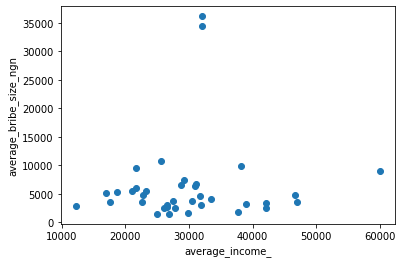

In [ ]:
# create a scatter plot
plt.scatter(x1, y)
plt.xlabel('average_income_', fontsize= 10)
plt.ylabel('average_bribe_size_ngn', fontsize= 10)
plt.savefig('pic',dpi=300)
plt.show

In [ ]:
#We noticed the two data points of average bribe size further away from the rest
Q1 = corruption_subset['average_income_'].quantile(0.25)
Q3 = corruption_subset['average_income_'].quantile(0.75)
IQR = Q3-Q1

without_outliers = corruption_subset[~((corruption_subset['average_income_']< Q1-1.5*IQR) | (corruption_subset['average_income_']> Q3+1.5*IQR))]
print(without_outliers.shape)
print(corruption_subset.shape)


(34, 2)
(37, 2)


In [ ]:
#create a regression model
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     average_bribe_size_ngn   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                 -0.021
Method:                     Least Squares   F-statistic:                    0.2469
Date:                    Thu, 19 Aug 2021   Prob (F-statistic):              0.622
Time:                            19:33:28   Log-Likelihood:                -381.61
No. Observations:                      37   AIC:                             767.2
Df Residuals:                          35   BIC:                             770.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4365.7013   4116.564      1.061      0.296   -3991.368    1.27e+04
average_income_     0.0654      0.132      0.497      0.622      -0.202       0.333
==============================================================================
Omnibus:                       50.929   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.557
Skew:                           3.297   Prob(JB):                     5.22e-51
Kurtosis:                      13.331   Cond. No.                     1.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

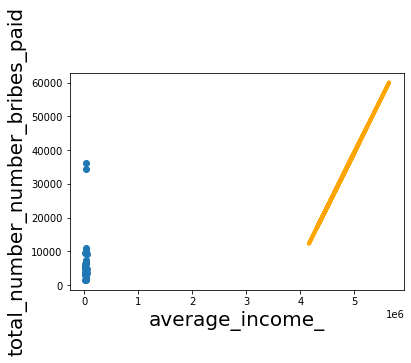

In [ ]:
#plot a regression line
plt.scatter(x1, y)
yhat = 31.05*x1 + 3.778e+06
fig = plt.plot(yhat, x1, lw= 4, c= 'orange', label= 'regression line')
plt.xlabel('average_income_', fontsize =20)
plt.ylabel('total_number_number_bribes_paid', fontsize = 20)
plt.show()

####Public officials dataset analysis

In [ ]:
sixteen= corrupt_officials[corrupt_officials['year']==2016]
nineteen=corrupt_officials[corrupt_officials['year']== 2019]

In [ ]:
#Overall which public office asked most people for bribes in 2016 and 2019.
#The public office that requested the most number of people for bribes in 2016 was:
sixteen =sixteen.dropna(axis=0, how='all')
sixteen_sum = sixteen.iloc[:,1:23].sum()
sixteen_sum.sort_values(ascending=False)

#police officers

police_officers                                                                         87356440.0
customs_officers                                                                        66491866.0
immigration_service_officers                                                            61435445.0
total_public_officials                                                                  61313328.0
tax/revenues_officers                                                                   57404486.0
car_registration/driving_license_agency_officers                                        56614951.0
prosecutors                                                                             54428399.0
judges/magistrates_at_the_court/prosecutors                                             51569805.0
officials_from_traffic_management_authority                                             51510714.0
judges/magistrates_at_the_court                                                         49892509.0
land_regis

In [ ]:
#Which public offices received the highest number of bribes in 2016 and 2019
bnineteen= bribes[bribes['year']==2019]
bsixteen= bribes[bribes['year']==2016]

max =bsixteen['average_no._of_bribes']== bsixteen['average_no._of_bribes'].max()
maxim = bnineteen['average_no._of_bribes']== bnineteen['average_no._of_bribes'].max()

#In 2019 the public office with the highest number of bribes was:
bnineteen[maxim]
#The members of parliament

,public_officer,year,average_no._of_bribes,average_bribe_size
17,Members of Parliament/Legislature,2019,5.17062,6070.297772


#### Investigating the most corrupt public officials

In [ ]:
#In 2016 the public office with the highest average number of bribes was:
bsixteen[max]
#Members of the armed forces.

,public_officer,year,average_no._of_bribes,average_bribe_size
5,Members of the Armed Forces,2016,5.468158,4388.148296


In [ ]:
# Which public office received the highest amount of money in form of bribes.
max =bsixteen['average_bribe_size']==bsixteen['average_bribe_size'].max()
maxim= bnineteen['average_bribe_size']==bnineteen['average_bribe_size'].max()

#In 2016 the public office with the highest amount of money having been received in form of bribes was:
bsixteen[max]
#members of parliament

,public_officer,year,average_no._of_bribes,average_bribe_size
0,Members of Parliament/Legislature,2016,1.677328,69361.995683


In [ ]:
#In 2019 the public office that had received the highest amount of money in form of bribe was:
bnineteen[maxim]
#The state government representatives

,public_officer,year,average_no._of_bribes,average_bribe_size
24,Elected local/state government representatives,2019,3.503356,35870.777632
